In [1]:
from google.colab import files
upload = files.upload()

Saving lam-sach-xong.csv to lam-sach-xong.csv


In [2]:
import pandas as pd


In [3]:
df= pd.read_csv('lam-sach-xong.csv')

In [ ]:
df

,Unnamed: 0,Year,month,day,order,country,session ID,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page
0,0,2008,April,1,1,Poland,1,trousers,A13,beige,bottom in the middle,En face,28,2,1
1,1,2008,April,1,2,Poland,1,trousers,A16,beige,bottom right,En face,33,2,1
2,2,2008,April,1,3,Poland,1,skirts,B4,olive,top in the middle,En face,52,1,1
3,3,2008,April,1,4,Poland,1,skirts,B17,gray,bottom right,Profile,38,2,1
4,4,2008,April,1,5,Poland,1,skirts,B8,brown,top right,Profile,52,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165469,165469,2008,August,13,1,Poland,24024,skirts,B10,black,bottom left,En face,67,1,1
165470,165470,2008,August,13,1,Czech Republic,24025,trousers,A11,blue,bottom left,En face,62,1,1
165471,165471,2008,August,13,1,Slovakia,24026,trousers,A2,blue,top left,En face,43,2,1
165472,165472,2008,August,13,2,Slovakia,24026,blouses,C2,red,top left,En face,43,1,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165474 entries, 0 to 165473
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Unnamed: 0               165474 non-null  int64 
 1   Year                     165474 non-null  int64 
 2   month                    165474 non-null  object
 3   day                      165474 non-null  int64 
 4   order                    165474 non-null  int64 
 5   country                  165474 non-null  object
 6   session ID               165474 non-null  int64 
 7   page 1 (main category)   165474 non-null  object
 8   page 2 (clothing model)  165474 non-null  object
 9   colour                   165474 non-null  object
 10  location                 165474 non-null  object
 11  model photography        165474 non-null  object
 12  price                    165474 non-null  int64 
 13  price 2                  165474 non-null  int64 
 14  page                

EDA

In [4]:
import plotly.express as px

Quốc gia nào có nhiều khách truy cập trang web nhất?


In [ ]:
df7 = df.groupby('country')[['price']].count()
df7 = df7.sort_values(['price'], ascending=False)
df7 = df7.query("price > 100")
fig = px.bar(df7, x=df7.index, y='price')
fig.show()


Flexibility in buying products for each country(Linh hoạt trong việc mua sản phẩm cho từng quốc gia¶)

In [ ]:
df8 = df.groupby('country')[['order']].sum()
df8 = df8.sort_values(['order'], ascending=False)

df9 = df.groupby('country')[['order']].count()
df9 = df9.sort_values(['order'], ascending=False)

df8['avreage_clicks'] = df8/df9
df8 = df8.sort_values(['avreage_clicks'], ascending=False)
df8 = df8.query("avreage_clicks > 3 ")

In [ ]:
fig = px.scatter(df8, x=df8.index, y="avreage_clicks",
                 size="avreage_clicks", color=df8.index, size_max=60)
fig.show()

In [5]:
import numpy as np
import plotly.express as px
import plotly.graph_objs as go

In [6]:
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots

Relationship between month and buying from the website( Mối quan hệ giữa tháng và mua từ trang web)

In [ ]:
df_1 = df.groupby("month")[["price"]].sum()
df_2 = df[df['month'] != 'August'].groupby("month")[["price"]].sum()

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type': 'domain'}, {'type': 'domain'}]])

fig.add_trace(go.Pie(labels=df_1.index, values=df_1["price"], name="All monthes"),
              1, 1)
fig.add_trace(go.Pie(labels=df_2.index, values=df_2['price'], name="All months except August"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hoverinfo="label+percent")

fig.update_layout(
    title_text="Relationship between month and buying from the website")

fig.show()

Như chúng ta có thể thấy tháng 4 và tháng 5 là tháng bán nhiều nhất và tháng 6 là tháng bán thấp nhất
Dữ liệu cho tháng 8 không đầy đủ. nó chỉ dừng lại ở ngày 13

In [ ]:
df[df['month'] == 'August']['day'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

In [7]:

import os
import seaborn as sns
import matplotlib.pyplot as plt

Người dùng có tìm kiếm sản phẩm rẻ hơn không? (Does users seek cheaper products ?)

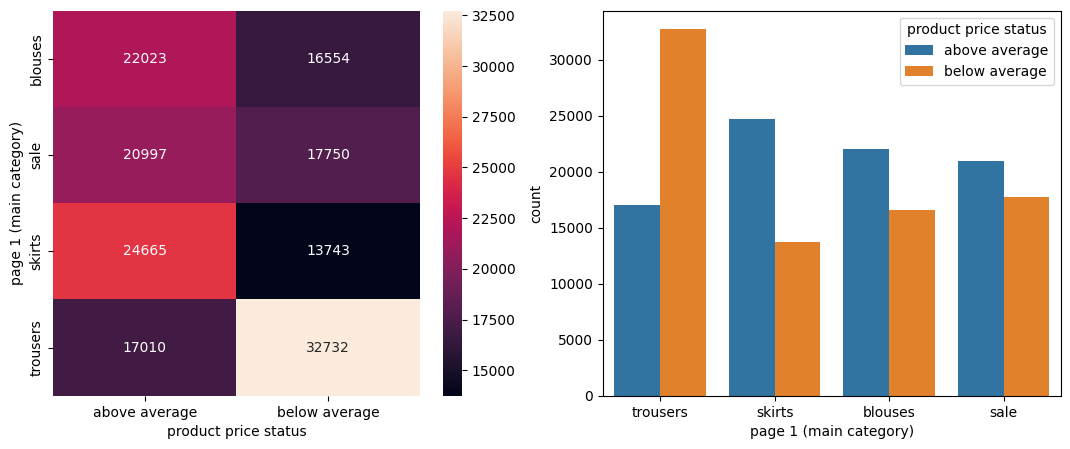

In [ ]:
df_copy = df.copy()
df_copy['product price status'] = df_copy['price 2'].map({
    1: 'above average',
    2: 'below average'
}).astype('category')

plt.figure(figsize= (13, 5))
#LEFT plot: Heatmap
plt.subplot(1, 2, 1)
# Use group_by() and size() to get the number of cars and each combination of the two variable levels as a pandas Series
ct_counts = df_copy.groupby(['page 1 (main category)', 'product price status']).size()
# Use Series.reset_index() to convert a series into a dataframe object
ct_counts = ct_counts.reset_index(name='count')
# Use DataFrame.pivot() to rearrange the data, to have page 1 (main category) names class on rows
ct_counts = ct_counts.pivot(index = 'page 1 (main category)', columns = 'product price status', values = 'count')
sns.heatmap(ct_counts, annot = True, fmt = 'd')
# RIGHT plot: Clustered box plot
plt.subplot(1, 2, 2)
sns.countplot(data = df_copy, x = 'page 1 (main category)', hue = 'product price status')
plt.show()

Có nhiều nhấp chuột hơn trên trang web đề cập đến doanh số bán hàng cao hơn? và danh mục chính có liên quan không?(Are more clicks on the website refer to higher sales? and is the main category related?
)

In [ ]:
df11 = df.groupby(by=["order",'page 1 (main category)'])[["price"]].sum().reset_index()
fig = px.scatter(df11, x="order", y="price",color=df11['page 1 (main category)'])
fig.show()

Câu trả lời cho câu hỏi của chúng tôi là KHÔNG vì số lần nhấp cao hơn 100 không bán chạy. Nói chung, quần được bán nhiều nhất cho hầu hết các đơn đặt hàng và sau đó là áo cánh

Danh mục bán chạy nhất là gì?

In [ ]:
df_1 = df.groupby("page 1 (main category)")[["price"]].count()
df_2 = df.groupby("page 1 (main category)")[["price"]].sum()

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type': 'domain'}, {'type': 'domain'}]],
                    subplot_titles = [
                        'Total sales per Type',
                        'Total sales in dollars per Type'])

fig.add_trace(go.Pie(labels=df_1.index, values=df_1["price"], name="All monthes"),
              1, 1)
fig.add_trace(go.Pie(labels=df_2.index, values=df_2['price'], name="All months except August"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hoverinfo="label+percent")

fig.update_layout(
    title_text="Relationship between month and buying from the website")

fig.show()

Có vẻ như quần dài được ưu tiên mua hơn nhưng danh mục của chúng tôi được phân bổ khá đều

Khách hàng mua gì từ mỗi trang?

In [ ]:
df1 = df.groupby(by=["page", "page 1 (main category)"]).size().reset_index(name="counts")

px.bar(data_frame=df1, x="page", y="counts",
       color="page 1 (main category)", barmode="group")

Trang đầu tiên là trang tốt nhất để bán đặc biệt cho danh mục quần và váy
Có vẻ như trang cuối cùng được ưu tiên cho các sản phẩm bán
chúng ta cũng có thể kết luận rằng:

Ở trang 1, Quần tây đẹp hơn các sản phẩm khác
Ở trang 2, Chân váy đẹp hơn các sản phẩm khác
Ở trang 3, Áo cánh đẹp hơn các sản phẩm khác
Finnaly ở trang 4 và 5, người dùng ghi nhận doanh số bán hàng

Phần hấp dẫn nhất trong trang và màu sắc của sản phẩm trên mỗi loại là gì?

In [ ]:
df2 = df.groupby(by=["location", "colour"]).size().reset_index(name="counts")
fig = px.scatter(df2, x="location", y="counts",
                 color='colour', size='counts', size_max=30)
fig.show()

Chúng ta có thể nhìn thấy:

Phía dưới bên trái và phía trên bên trái là những phần hấp dẫn nhất trên trang web
Người dùng thích sản phẩm có màu xanh ở phần trên cùng
Người dùng thích sản phẩm có màu đen ở phần dưới cùng bên trái và dưới cùng bên phải
Người dùng thích những sản phẩm có nhiều màu sắc ở phần dưới cùng ở giữa

Sản phẩm đang bán có bị ảnh hưởng bởi màu sắc không?



In [ ]:
df3 = df.groupby("colour")[["price"]].sum()
df3 = df3.sort_values(['price'], ascending=False)

In [ ]:
fig = px.bar(data_frame=df3, x=df3.index, y="price", text_auto='.2s', color=df3.index,
             title="Colour of products with their prices")
fig.update_traces(textfont_size=12, textangle=0,
                  textposition="outside", cliponaxis=False)
fig.show()

In [8]:
df3 = df.groupby("colour")[["price"]].sum()
df3 = df3.sort_values(['price'], ascending=False)

color_map = {
    "blue": "blue",
    "black": "black",
    "gray": "gray",
    "brown": "brown",
    "white": "white",
    "red": "red",
    "beige": "beige",
    "violet": "violet",
    "green": "green",
    "olive": "olive",
    "navy blue": "darkblue",
    "burgundy": "maroon",

}

fig = px.bar(data_frame=df3, x=df3.index, y="price", text_auto='.2s', color=df3.index,
             title="Colour of products with their prices", color_discrete_map=color_map)
fig.update_traces(textfont_size=12, textangle=0,
                  textposition="outside", cliponaxis=False)
fig.show()

Có vẻ như việc bán sản phẩm bị ảnh hưởng bởi màu sắc và chúng ta có thể kết luận rằng:

màu xanh và đen được ưa thích cho khách hàng

Mối quan hệ giữa các quốc gia và ngày mua

In [ ]:
df_sum = df.groupby(by=["country", 'day'])[['price']].sum().reset_index()
df_sum = df_sum.sort_values(['price'], ascending=False)

count = df.groupby(by=["country", 'day'])[['price']].count().reset_index()
count = count.sort_values(['price'], ascending=False)

df_sum['avreage_prices'] = df_sum['price']/count['price']
df_sum = df_sum.sort_values(['avreage_prices'], ascending=False)

fig = px.scatter(df_sum, x=df_sum["country"], y=df_sum["day"],color=df_sum['avreage_prices'],size=df_sum['avreage_prices'])
fig.show()

Đối với Ba Lan, sản phẩm bán chạy rất cao vào đầu tháng và sau đó giảm dần vào ngày cuối cùng của tháng

Đối với Cộng hòa Séc, sản phẩm bán ra tăng giảm theo các ngày trong tháng

Chúng ta nên chụp ảnh người mẫu trên mặt sản phẩm hay bên trong hồ sơ?

In [ ]:
df5 = df.groupby(by=["model photography", 'page 1 (main category)'])[
    'price'].count().reset_index(name="counts")
px.bar(data_frame=df5, x="model photography", y="counts",
       color="page 1 (main category)", barmode="group")

CÓ, chúng ta nên chụp ảnh người mẫu trên mặt sản phẩm


Mối quan hệ giữa số ngày bán và số ngày mua trong tháng

In [ ]:
df9 = df[df['page 1 (main category)']== "sale"]
df9 = df.groupby(by=["month","day"])['page 1 (main category)'].count().reset_index(name="counts")


fig = px.scatter(df9, y='month', x="day",
                 size="counts")
fig.show()

Tiền xử lý dữ liệu

Dữ liệu bị mất

In [ ]:
total = df.shape[0]
missing_columns = [col for col in df.columns if df[col].isnull().sum() > 0]
for col in missing_columns:
    null_count = df[col].isnull().sum()
    per = (null_count/total) * 100
    print(f"{col}: {null_count} ({round(per, 3)}%)")

Tuyệt vời, Không thiếu giá trị

Duplicates

In [ ]:
print(f"Number of duplicate rows: {df.duplicated().sum()}")

Number of duplicate rows: 0


Không có hàng trùng lặp

Remove useless columns

In [ ]:
df.drop('session ID', axis=1, inplace=True)

Data Distribution

<ipython-input-39-c700bdb8fe85>:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2511: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




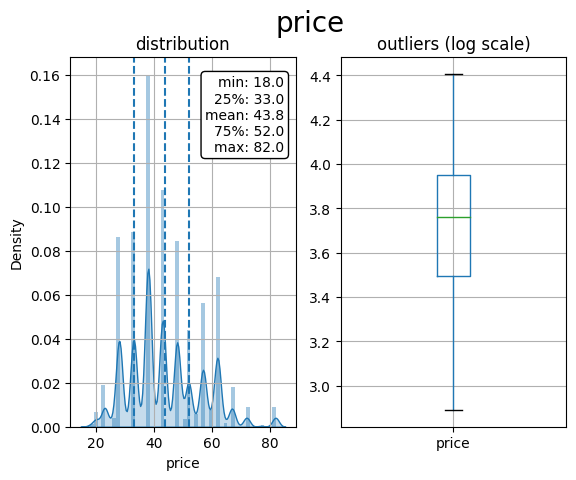

In [ ]:
x = "price"
fig, ax = plt.subplots(nrows=1, ncols=2,  sharex=False, sharey=False)
fig.suptitle(x, fontsize=20)
### distribution
ax[0].title.set_text('distribution')
sns.distplot(df_copy[x], hist=True, kde=True, kde_kws={"shade": True}, ax=ax[0])
des = df_copy[x].describe()
ax[0].axvline(des["25%"], ls='--')
ax[0].axvline(des["mean"], ls='--')
ax[0].axvline(des["75%"], ls='--')
ax[0].grid(True)
des = round(des, 2).apply(lambda x: str(x))
box = '\n'.join(("min: "+des["min"], "25%: "+des["25%"], "mean: "+des["mean"], "75%: "+des["75%"], "max: "+des["max"]))
ax[0].text(0.95, 0.95, box, transform=ax[0].transAxes, fontsize=10, va='top', ha="right", bbox=dict(boxstyle='round', facecolor='white', alpha=1))
### boxplot
ax[1].title.set_text('outliers (log scale)')
tmp_dtf = pd.DataFrame(df_copy[x])
tmp_dtf[x] = np.log(df_copy[x])
tmp_dtf.boxplot(column=x, ax=ax[1])
plt.show()

Outliers

In [ ]:
# for col in df:
#     if col != 'price' and is_numeric_dtype(df[col]):
#         print('-'*30)
#         fig, ax = plt.subplots(2, 1, figsize=(12, 4))
#         g1 = sns.boxplot(x = df[col], ax=ax[0])
#         g2 = sns.scatterplot(data=df, x=df[col],y=df['price'], ax=ax[1])
#         plt.show()
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder



Sau khi kiểm tra các ngoại lệ, nó dường như là dữ liệu quan trọng

Label Encoding¶

In [ ]:
encoders = {}
for col in df.columns:
    if df[col].dtype == 'object':
            label_encoder = LabelEncoder()
            df[col] = label_encoder.fit_transform(df[col])
            encoders[col] = label_encoder

In [ ]:
df["price 2"] = df["price 2"] - 1

Correlation Matrix

Text(0.5, 1.0, 'pearson correlation')

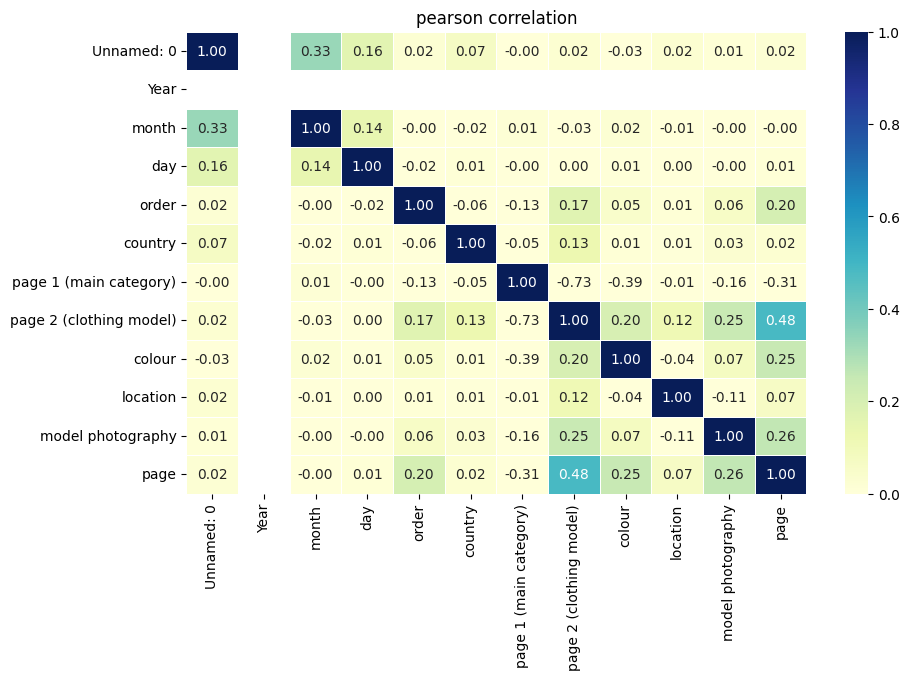

In [ ]:
df_copy2 = df.drop(['price','price 2'], axis=1)
plt.figure(figsize=(10,6))
corr_matrix = df_copy2.corr(method="pearson")
sns.heatmap(corr_matrix, vmin=0, vmax=1, annot=True, fmt='.2f', cmap="YlGnBu", cbar=True, linewidths=0.5)
plt.title("pearson correlation")